11490434/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
Epoch 1/12
469/469 [==============================] - 2s 4ms/step - loss: 0.4936 - accuracy: 0.8669 - val

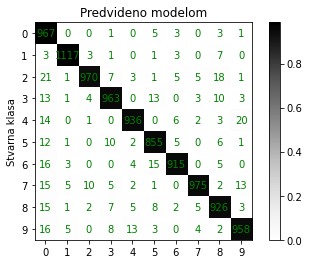

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                294944    
                                                      

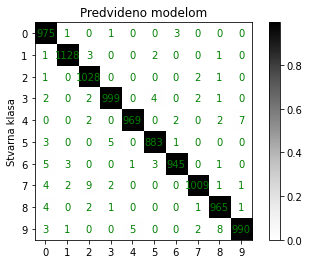

In [4]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from plot_confusion_matrix import *

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# train i test podaci
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# prikaz karakteristika train i test podataka
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# TODO: prikazi nekoliko slika iz train skupa 1-1
#for imageCount in range(15):
   # print(y_train[imageCount])
   # plt.imshow(x_train[imageCount], cmap='Greys')
   # plt.show()
####################################################################

# skaliranje slike na raspon [0,1]
x_train_s = x_train.astype("float32") / 255
x_test_s = x_test.astype("float32") / 255

# slike trebaju biti (28, 28, 1)
x_train_s = np.expand_dims(x_train_s, -1)
x_test_s = np.expand_dims(x_test_s, -1)

print("x_train shape:", x_train_s.shape)
print(x_train_s.shape[0], "train samples")
print(x_test_s.shape[0], "test samples")


# pretvori labele
y_train_s = keras.utils.to_categorical(y_train, num_classes)
y_test_s = keras.utils.to_categorical(y_test, num_classes)


# TODO: kreiraj model pomocu keras.Sequential(); prikazi njegovu strukturu 1-2
modelKeras = keras.Sequential()
modelKeras.add(keras.Input(input_shape))
modelKeras.add(layers.Flatten())
modelKeras.add(layers.Dense(32, activation = 'relu', ))
modelKeras.add(layers.Dense(num_classes,activation = 'softmax'))
modelKeras.summary()
####################################################################

# TODO: definiraj karakteristike procesa ucenja pomocu .compile()
modelKeras.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
####################################################################

# TODO: provedi ucenje mreze 
batch_size = 128
epochs = 12
modelKeras.fit(x_train_s, y_train_s,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_s, y_test_s))
####################################################################

# TODO: Prikazi test accuracy i matricu zabune 1-3 i 1-4
scoreTest = modelKeras.evaluate(x_test_s, y_test_s, verbose=0)
print('Sequential Test loss:', scoreTest[0])
print('Sequential Test accuracy:', scoreTest[1])
scoreTrain = modelKeras.evaluate(x_train_s, y_train_s, verbose=0)
print('Sequential Train loss:', scoreTrain[0])
print('Sequential Train accuracy:', scoreTrain[1])

classes = modelKeras.predict(x_test_s, batch_size=batch_size)
y_pred = (classes > 0.5)
confusionMatrix = confusion_matrix(y_test_s.argmax(axis=1), y_pred.argmax(axis=1))
plot_confusion_matrix(confusionMatrix)
####################################################################

# TODO: spremi model 1-5
modelKeras.save("test_model.h5")

####################################################################

# ZADATAK 1-6
model_convo = keras.Sequential()
model_convo.add(keras.Input(input_shape))
model_convo.add(layers.Conv2D(32, kernel_size=(3, 3),
     activation='relu'))
model_convo.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_convo.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_convo.add(layers.Dropout(0.25))
model_convo.add(layers.Flatten())
model_convo.add(layers.Dense(32, activation = 'relu', ))
model_convo.add(layers.Dropout(0.5))
model_convo.add(layers.Dense(num_classes,activation = 'softmax'))
model_convo.summary()

model_convo.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_convo.fit(x_train_s, y_train_s,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_s, y_test_s))
scoreTest = model_convo.evaluate(x_test_s, y_test_s, verbose=0)
print('Convolutional Test loss:', scoreTest[0])
print('Convolutional Test accuracy:', scoreTest[1])
scoreTrain = model_convo.evaluate(x_train_s, y_train_s, verbose=0)
print('ConvolutionalTrain loss:', scoreTrain[0])
print('Convolutional Train accuracy:', scoreTrain[1])

classes_convo = model_convo.predict(x_test_s, batch_size=batch_size)
y_pred_convo = (classes_convo > 0.5)
confusionMatrix_convo = confusion_matrix(y_test_s.argmax(axis=1), y_pred_convo.argmax(axis=1))
plot_confusion_matrix(confusionMatrix_convo)

modelKeras.save("test_model_convo.h5")



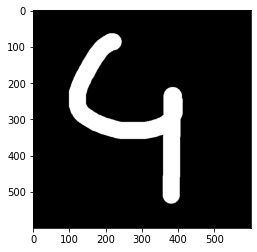

1/1 [==============================] - 0s 54ms/step
********************
4


In [6]:
#from keras.preprocessing.image import img_to_array
from keras.models import load_model
from matplotlib import pyplot as plt
from skimage.transform import resize
from skimage import color
import cv2 as cv
import numpy as np

filename = 'test.png'

img= cv.imread(filename)
#----------------------------------------------------------
loadedImage = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
loadedImage = resize(loadedImage, (28, 28))


plt.figure()
plt.imshow(img, cmap=plt.get_cmap('gray'))
plt.show()


loadedImage = loadedImage.reshape(1, 28, 28, 1)
loadedImage = loadedImage.astype('float32')


# TODO: ucitaj model
model = load_model('test_model.h5')

# TODO: napravi predikciju 
prediction = model.predict(loadedImage)

# TODO: ispis rezultat
print("********************")
print(prediction.argmax())



